In [13]:
import numpy as np
import pandas as pd

# import plotnine
from plotnine import ggplot, aes, geom_line, geom_point, geom_errorbar, \
                     facet_wrap, position_dodge, theme, geom_violin, xlab, ylab, \
                     coord_flip, geom_bar, element_text, scale_x_discrete, scale_fill_manual, \
                     geom_hline, xlim, ylim

import warnings
import plotnine

In [3]:
regression = pd.read_csv("claim_1_1_regression.csv")
display(regression)

FileNotFoundError: [Errno 2] No such file or directory: 'claim_1_1_regression.csv'

In [4]:
# for each bootstrap sample who was the best second best
best_regr = pd.pivot_table(regression, values='test_score', index = ["dataset", "boot_iter", "max_leaves"], columns=['algorithm']).reset_index().drop(["boot_iter"], axis = 1)
regr_rank = []
for i, row in best_regr.iterrows():
    row_dict = row.drop(["dataset", "max_leaves"]).to_dict()
    regr_rank.append([k for k, v in sorted(row_dict.items(), key=lambda item: -item[1])])

NameError: name 'regression' is not defined

In [5]:
def plot_fig_4(res):
    res = res.copy()

    res_group = res.drop(["regularization", "max_leaves", "boot_iter", "train_wall_time", "test_wall_time", "train_cpu_time", "test_cpu_time", "tunning_wall_time", "tunning_cpu_time"], axis = 1).groupby(["task", "dataset", "algorithm", "scoring", "n_leaves"])
    res_mu = res_group.mean()
    res_mu.columns = ["train_mu", "test_mu"]
    res_std = res_group.std()
    res_std.columns = ["train_std", "test_std"]
    res = res_mu.join(res_std)
    res["test_min"] = res["test_mu"] - res["test_std"]
    res["test_max"] = res["test_mu"] + res["test_std"]
    res["train_min"] = res["train_mu"] - res["train_std"]
    res["train_max"] = res["train_mu"] + res["train_std"]
    res = res.reset_index()

    g = (ggplot(res, aes(x="n_leaves", y="test_mu", color="algorithm")) + 
         geom_line() +
         geom_errorbar(aes(ymin="test_min", ymax="test_max"), width=.2,
                     position=position_dodge(0.05)) +
         facet_wrap("dataset", scales = "free") +
         theme(subplots_adjust={'wspace':0.8}) +
         theme(figure_size=(16, 8))
         )

    display(g)



In [6]:
plot_fig_4(regression)

NameError: name 'regression' is not defined

,task,dataset,boot_iter,algorithm,scoring,n_leaves,max_leaves,regularization,train_score,test_score,train_wall_time,test_wall_time,train_cpu_time,test_cpu_time,tunning_wall_time,tunning_cpu_time
0,classification,heart,0,DT,AUC,1,2,None,0.756250,0.745000,0.000399,0.000148,0.000398,0.000148,NaN,NaN
1,classification,heart,0,HS (CART),AUC,1,2,0.1,0.756250,0.745000,0.000106,0.000114,0.000107,0.000115,0.014774,0.014981
2,classification,heart,0,DT,AUC,3,4,None,0.873563,0.782250,0.000339,0.000117,0.000339,0.000117,NaN,NaN
3,classification,heart,0,HS (CART),AUC,3,4,50.0,0.862187,0.795250,0.000188,0.000159,0.000189,0.000159,0.014960,0.014962
4,classification,heart,0,DT,AUC,7,8,None,0.913000,0.822250,0.000495,0.000161,0.000495,0.000161,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,classification,recidivism,99,HS (CART),AUC,27,28,100.0,0.758413,0.732458,0.000406,0.000418,0.000407,0.000418,0.063826,0.063826
15996,classification,recidivism,99,DT,AUC,29,30,None,0.761729,0.728562,0.003681,0.000422,0.003681,0.000422,NaN,NaN
15997,classification,recidivism,99,HS (CART),AUC,29,30,100.0,0.759782,0.732460,0.000427,0.000417,0.000427,0.000418,0.064580,0.064647
15998,classification,recidivism,99,DT,AUC,31,32,None,0.763354,0.725403,0.003700,0.000435,0.003699,0.000435,NaN,NaN


/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/facets/facet.py:446: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


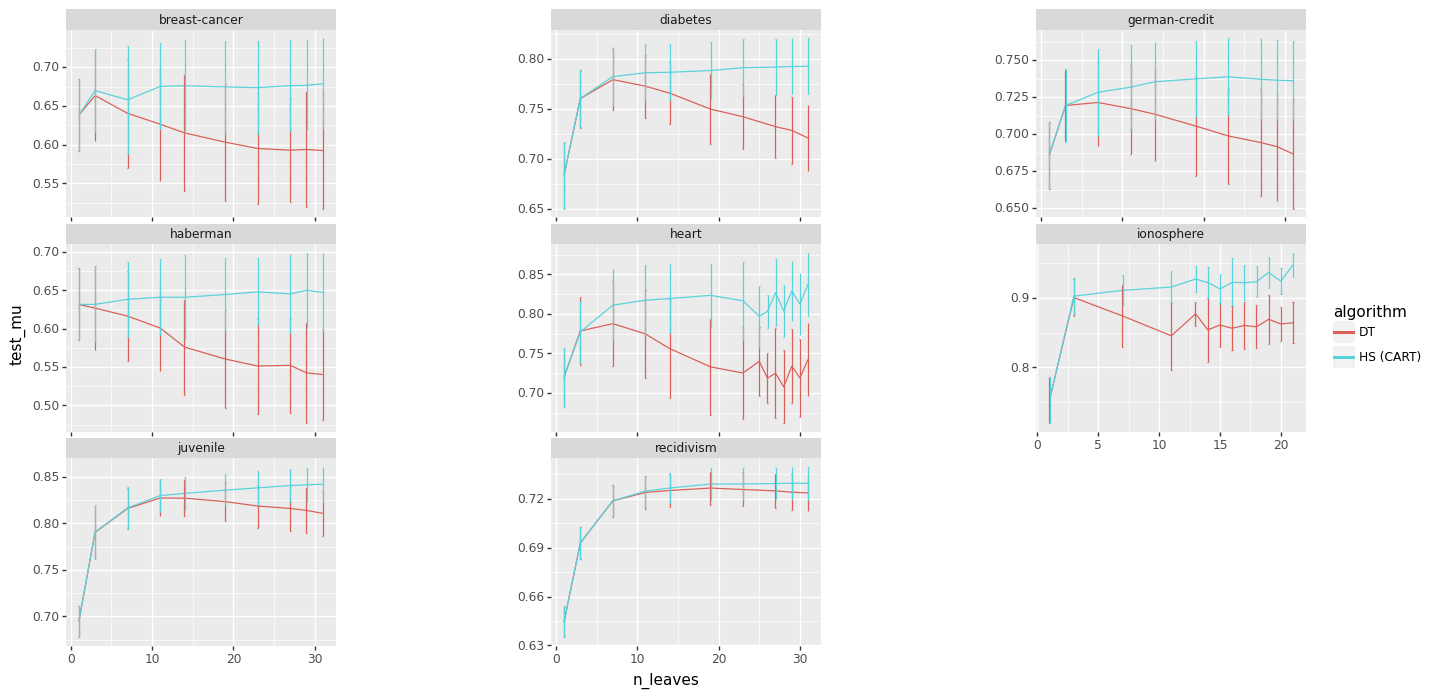

<ggplot: (8776875132925)>

In [7]:
classification = pd.read_csv("results/claim_1_1_dt_comparison_classification.csv")
display(classification)

# drop points with small sample size (reduce noise)
prunned_classification = classification.copy()

for algorithm in classification["algorithm"].unique():
    for dataset in classification["dataset"].unique():
        for n_leaves in classification["n_leaves"].unique():
            if len(prunned_classification.loc[(prunned_classification["n_leaves"] == n_leaves) & (prunned_classification["algorithm"] == algorithm) & (prunned_classification["dataset"] == dataset)]) < 10:
                prunned_classification = prunned_classification.loc[(prunned_classification["n_leaves"] != n_leaves) | (prunned_classification["algorithm"] != algorithm) | (prunned_classification["dataset"] != dataset)]

prunned_classification

plot_fig_4(prunned_classification)

In [8]:
# calculate the likelihoods that one method will return a better result than the other method
def likelihood_of_being_better(scores_a, scores_b, rope = 0.005):
    # sample size to small
    if len(scores_a) < 5 or len(scores_b) < 5:
        return 0.0, 0.0, 0.0
    
    # take 1000 random samples from each model
    sample_a = np.random.choice(scores_a, 100)
    sample_b = np.random.choice(scores_b, 100)
    
    # calculate the fraction of times each model is better
    p_improvement = np.mean((sample_a < sample_b) & (np.abs(sample_a - sample_b) > rope))
    p_same = np.mean(np.abs(sample_a - sample_b) < rope)
    p_deterioration = np.mean((sample_a > sample_b) & (np.abs(sample_a - sample_b) > rope))
    
    return p_improvement, p_same, p_deterioration

def likelihood_of_improvement(scores_a, scores_b, rope = 0.005):
    # sample size to small
    if len(scores_a) < 5 or len(scores_b) < 5:
        return 0.0, 0.0, 0.0
    
    # calculate the fraction of times each model is better
    p_improvement = np.mean((scores_a < scores_b) & (np.abs(scores_a - scores_b) > rope))
    p_same = np.mean(np.abs(scores_a - scores_b) < rope)
    p_deterioration = np.mean((scores_a > scores_b) & (np.abs(scores_a - scores_b) > rope))
    
    return p_improvement, p_same, p_deterioration

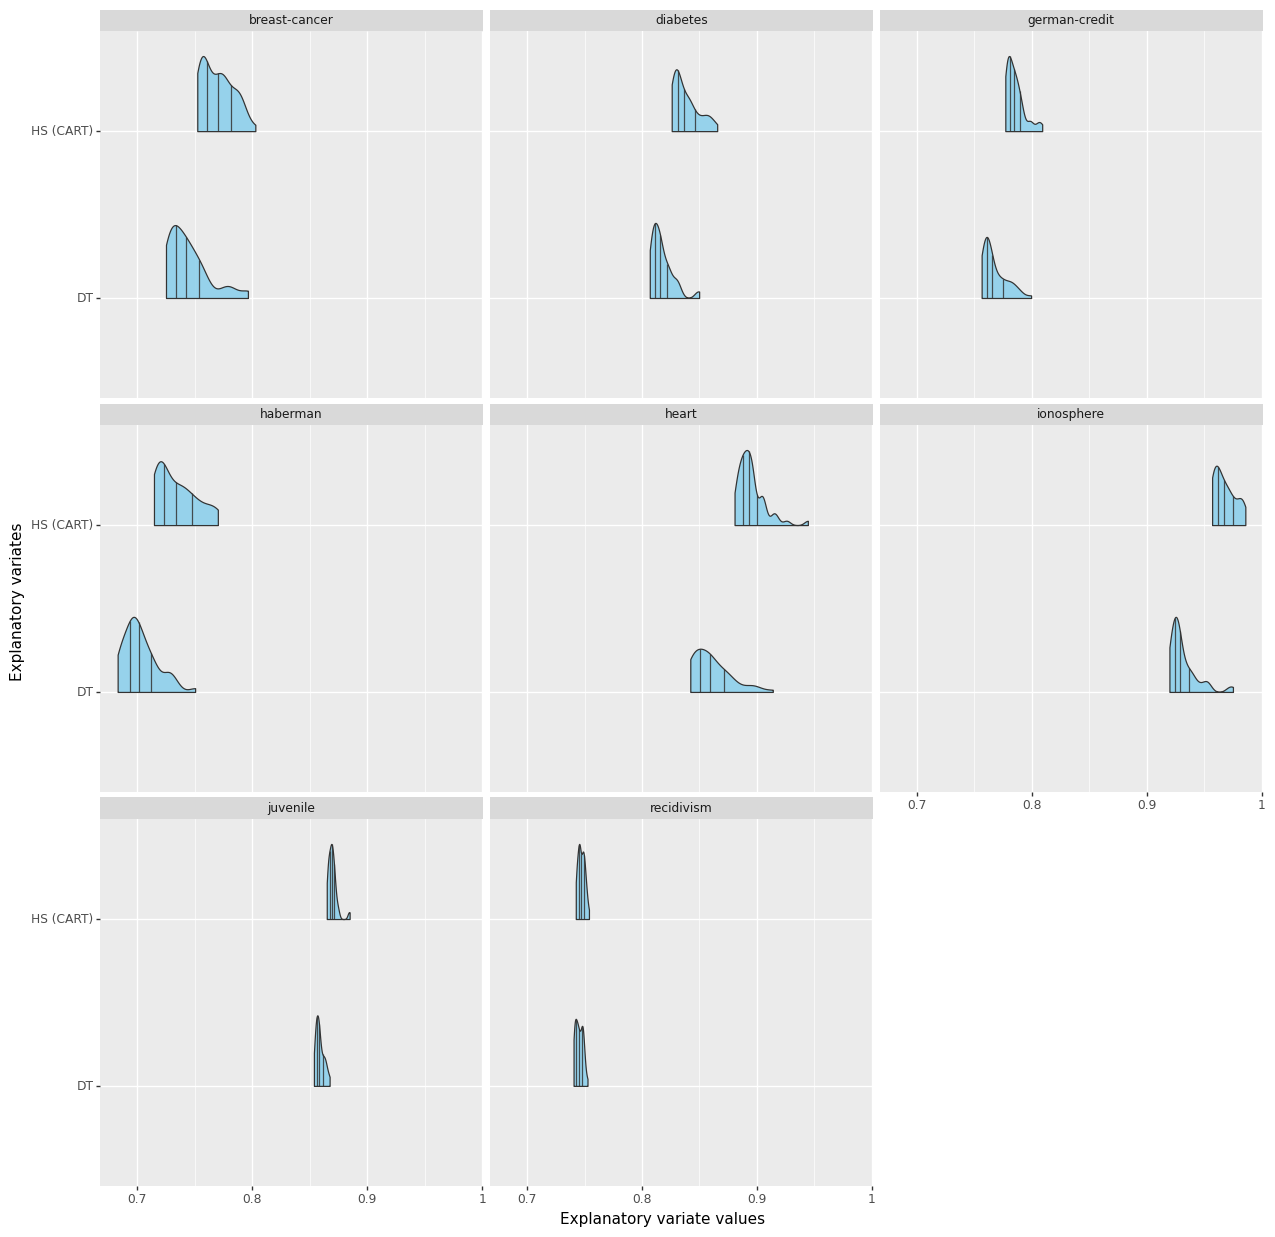

<ggplot: (8776864430957)>

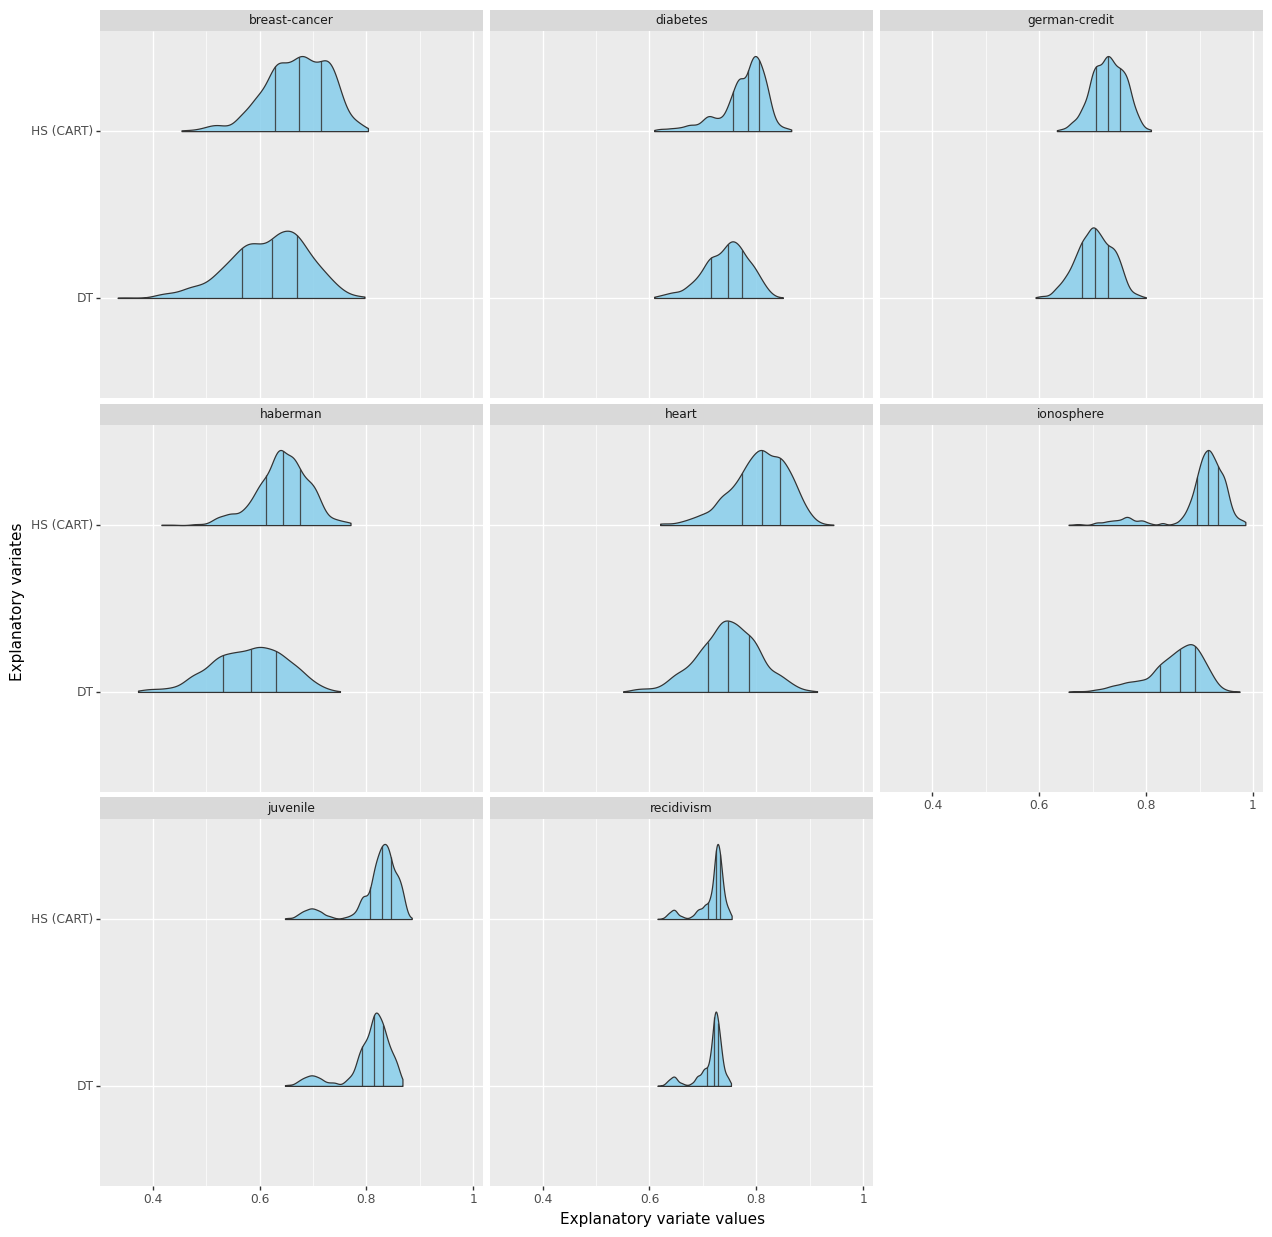

<ggplot: (8776859666607)>

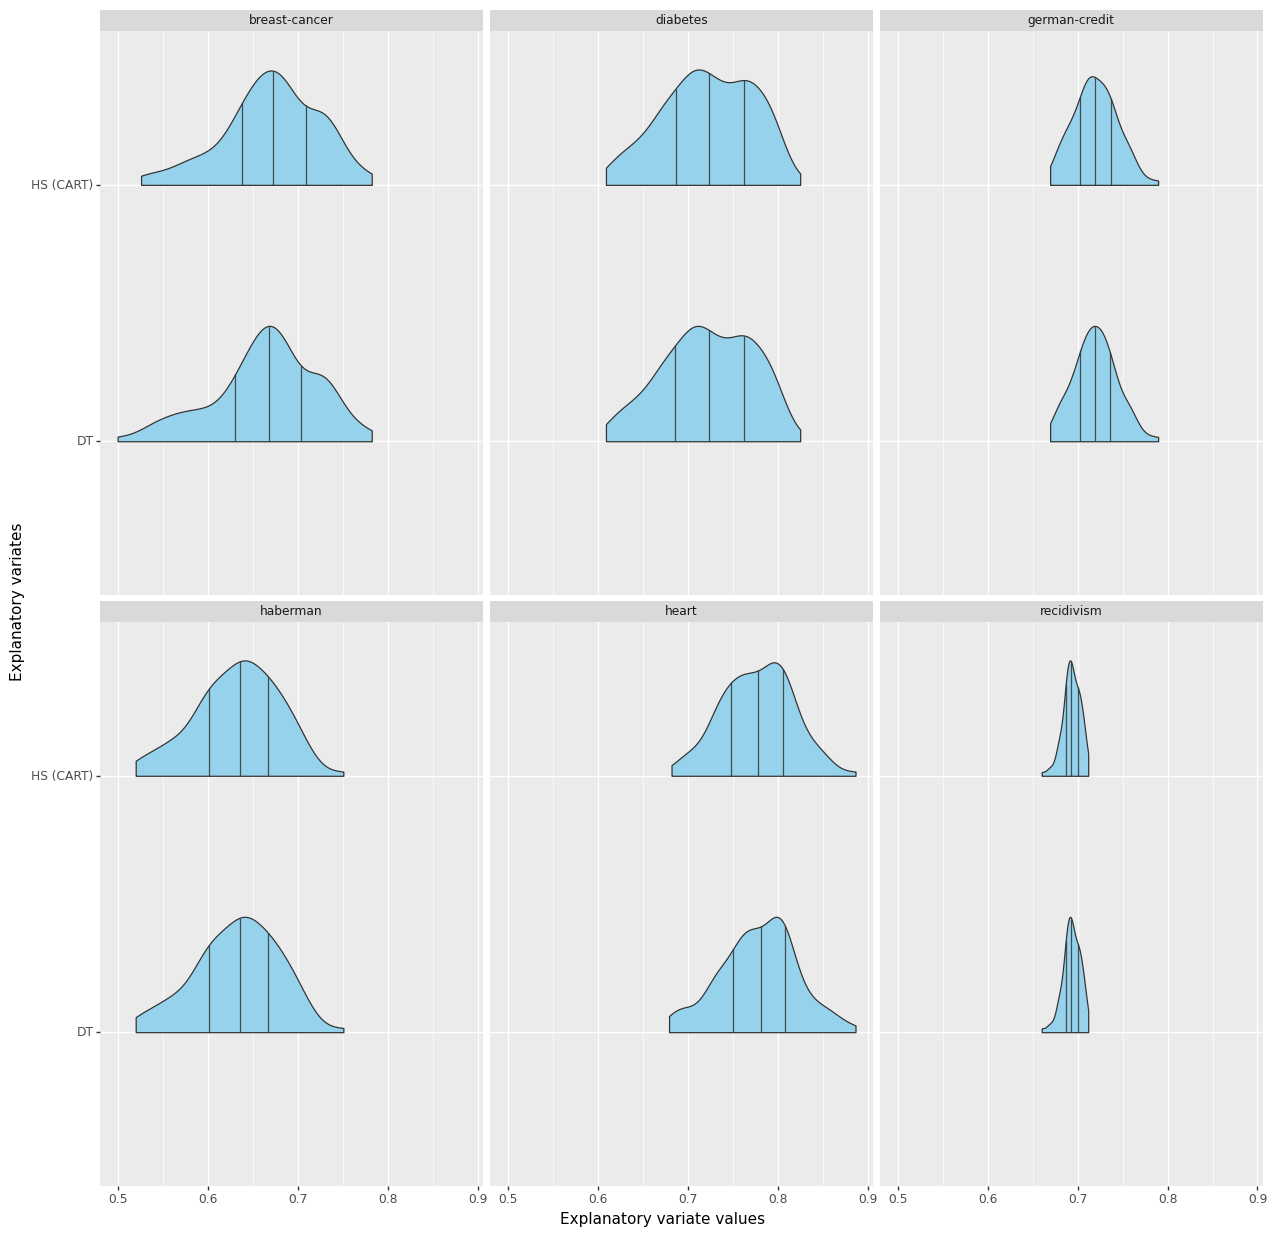

<ggplot: (8776865761422)>

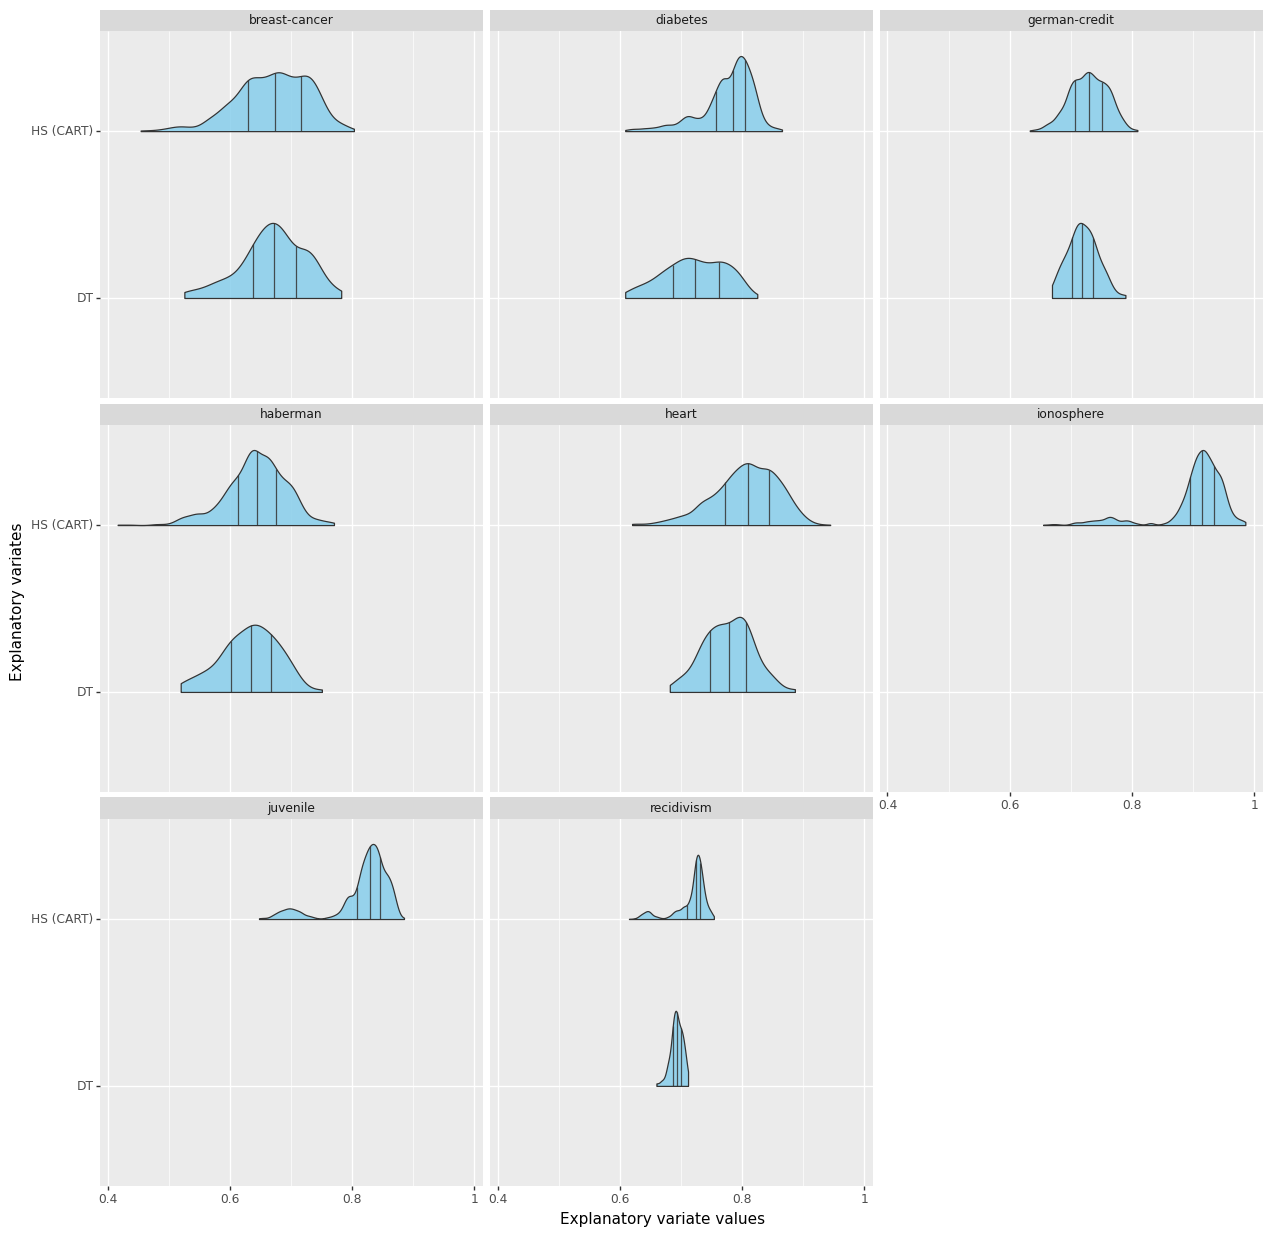

<ggplot: (8776875131953)>

In [77]:
# change plotnine size for easier visualization
plotnine.options.figure_size = (20, 20)

### Pick top best n-scores from HS-DT and DT (95 % quantile)

q95 = 0.05 # 95 percentile

top_scores = {algorithm: {dataset: [] for dataset in np.unique(classification["dataset"])} for algorithm in np.unique(classification["algorithm"])}

# traverse through all groups of (algorithm, dataset)
for algorithm in np.unique(classification["algorithm"]):
    for dataset in np.unique(classification["dataset"]):
        # sort values in each group from largest to smallest
        scores = classification.loc[(classification["algorithm"] == algorithm) & (classification["dataset"] == dataset)].sort_values(["test_score"], ascending = False)["test_score"].to_numpy()
        
        # pick only the top 0.05 scores from each group
        num_scores = len(scores)
        top_percentile = int(np.round(q95 * num_scores))
        top_score = scores[:top_percentile]
        
        # store results
        top_scores[algorithm][dataset] = top_score

# convert results to dataset
top_disp = pd.DataFrame(columns = ["algorithm", "dataset", "test_score"])
        
for algorithm in np.unique(classification["algorithm"]):
    for dataset in np.unique(classification["dataset"]):
        for score in top_scores[algorithm][dataset]:
            top_disp = pd.concat([top_disp, pd.DataFrame({"algorithm": [algorithm], "dataset": [dataset], "test_score": score})])
            
# calculate likelihood that HS-DT is better than DT
top_improvement = {dataset: None  for dataset in np.unique(classification["dataset"])}
for dataset in np.unique(classification["dataset"]):
    # get top results for each algorithm
    top_subset_dt = top_disp.loc[(top_disp["algorithm"] == "DT") & (top_disp["dataset"] == dataset)]
    top_subset_hs = top_disp.loc[(top_disp["algorithm"] == "HS (CART)") & (top_disp["dataset"] == dataset)]
    # compare randomly sampled pairs of top results which one is better
    top_improvement[dataset] = likelihood_of_being_better(np.array(top_subset_dt["test_score"]), np.array(top_subset_hs["test_score"]))

### Check how likely it is that HS-CART will give you a better result than CART day-to-day
any_improvement = {dataset: None  for dataset in np.unique(classification["dataset"])}
    
for dataset in np.unique(classification["dataset"]):
    # get top results for each algorithm 
    any_subset_dt = classification.loc[(classification["algorithm"] == "DT") & (classification["dataset"] == dataset)]
    any_subset_hs = classification.loc[(classification["algorithm"] == "HS (CART)") & (classification["dataset"] == dataset)]
    # compare randomly sampled pairs of results which one is better
    any_improvement[dataset] = likelihood_of_improvement(np.array(any_subset_dt["test_score"]), np.array(any_subset_hs["test_score"]))
        
### Check how likely it is that using default parameters someone will get a better reults using HS-CART than CART

TOL_LEAF = 2 # tolarence for deviation from ideal num. of leaves

# default leaf values sqrt(num. of features)
leaf_heuristic = {"heart": np.floor(np.sqrt(15)),
                  "breast-cancer": np.floor(np.sqrt(17)),
                  "haberman": np.floor(np.sqrt(3)),
                  "ionosphere": np.floor(np.sqrt(34)),
                  "diabetes": np.floor(np.sqrt(8)),
                  "german-credit": np.floor(np.sqrt(20)),
                  "juvenile": np.floor(np.sqrt(286)),
                  "recidivism": np.floor(np.sqrt(20))}

heuristic_scores = classification.copy()
heuristic_scores = {algorithm: {dataset: [] for dataset in np.unique(classification["dataset"])} for algorithm in np.unique(classification["algorithm"])}

# for each group (algorithm, dataset)
for dataset in np.unique(classification["dataset"]):
    n_leaves = leaf_heuristic[dataset]
    for algorithm in np.unique(classification["algorithm"]):
        # pick points near ideal number of leaves
        heuristic_scores[algorithm][dataset] = np.array(classification.loc[(classification["algorithm"] == algorithm) & (classification["dataset"] == dataset) & (np.abs(classification["n_leaves"] - n_leaves) < TOL_LEAF)]["test_score"])

# convert dictionary to dataset
heuristic_disp = pd.DataFrame(columns = ["algorithm", "dataset", "test_score"])
        
for algorithm in np.unique(classification["algorithm"]):
    for dataset in np.unique(classification["dataset"]):
        for score in heuristic_scores[algorithm][dataset]:
            heuristic_disp = pd.concat([heuristic_disp, pd.DataFrame({"algorithm": [algorithm], "dataset": [dataset], "test_score": score})])

# calculate likelihood of improvement
heuristic_improvement = {dataset: None  for dataset in np.unique(classification["dataset"])}
for dataset in np.unique(classification["dataset"]):
    # split points based on dataset
    heuristic_subset_dt = heuristic_disp.loc[(heuristic_disp["algorithm"] == "DT") & (heuristic_disp["dataset"] == dataset)]
    heuristic_subset_hs = heuristic_disp.loc[(heuristic_disp["algorithm"] == "HS (CART)") & (heuristic_disp["dataset"] == dataset)]
    # compare randomly sampled pairs of results which one is better
    heuristic_improvement[dataset] = likelihood_of_improvement(np.array(heuristic_subset_dt["test_score"]), np.array(heuristic_subset_hs["test_score"]))
            
# default / proposed # of features
baseline_scores = classification.copy()

baseline_scores = {algorithm: {dataset: [] for dataset in np.unique(classification["dataset"])} for algorithm in np.unique(classification["algorithm"])}

for dataset in np.unique(classification["dataset"]):
    n_leaves = leaf_heuristic[dataset]
    baseline_scores["DT"][dataset] = np.array(classification.loc[(classification["algorithm"] == algorithm) & (classification["dataset"] == dataset) & (np.abs(classification["n_leaves"] - n_leaves) < TOL_LEAF)]["test_score"])
    baseline_scores["HS (CART)"][dataset] = np.array(classification.loc[(classification["algorithm"] == algorithm) & (classification["dataset"] == dataset)]["test_score"])
        
baseline_disp = pd.DataFrame(columns = ["algorithm", "dataset", "test_score"])
        
for algorithm in np.unique(classification["algorithm"]):
    for dataset in np.unique(classification["dataset"]):
        for score in baseline_scores[algorithm][dataset]:
            baseline_disp = pd.concat([baseline_disp, pd.DataFrame({"algorithm": [algorithm], "dataset": [dataset], "test_score": score})])
            
baseline_improvement = {dataset: None  for dataset in np.unique(classification["dataset"])}
for dataset in np.unique(classification["dataset"]):
    baseline_subset_dt = baseline_disp.loc[(baseline_disp["algorithm"] == "DT") & (baseline_disp["dataset"] == dataset)]
    baseline_subset_hs = baseline_disp.loc[(baseline_disp["algorithm"] == "HS (CART)") & (baseline_disp["dataset"] == dataset)]
    baseline_improvement[dataset] = likelihood_of_being_better(np.array(baseline_subset_dt["test_score"]), np.array(baseline_subset_hs["test_score"]))
            
# probability as a function of leaves
leaf_scores = {algorithm: {dataset: {n_leaves: None for n_leaves in np.unique(classification["n_leaves"])} for dataset in np.unique(classification["dataset"])} for algorithm in np.unique(classification["algorithm"])}
for algorithm in np.unique(classification["algorithm"]):
    for dataset in np.unique(classification["dataset"]):
        for n_leaves in np.unique(classification["n_leaves"]):
            leaf_scores[algorithm][dataset][n_leaves] = np.array(classification.loc[(classification["algorithm"] == algorithm) & (classification["dataset"] == dataset) & (np.abs(classification["n_leaves"] - n_leaves) < TOL_LEAF)]["test_score"])

leaf_disp = pd.DataFrame(columns = ["algorithm", "dataset", "test_score"])

for algorithm in np.unique(classification["algorithm"]):
    for dataset in np.unique(classification["dataset"]):
        for n_leaves in np.unique(classification["n_leaves"]):
            for score in leaf_scores[algorithm][dataset][n_leaves]:
                leaf_disp = pd.concat([leaf_disp, pd.DataFrame({"algorithm": [algorithm], "dataset": [dataset], "n_leaves": n_leaves, "test_score": score})])

leaf_improvement = {dataset: {n_leaves: None for n_leaves in np.unique(classification["n_leaves"])}  for dataset in np.unique(classification["dataset"])}
for dataset in np.unique(classification["dataset"]):
    for n_leaves in np.unique(classification["n_leaves"]):
        leaf_subset_dt = leaf_disp.loc[(leaf_disp["algorithm"] == "DT") & (leaf_disp["dataset"] == dataset)]
        leaf_subset_hs = leaf_disp.loc[(leaf_disp["algorithm"] == "HS (CART)") & (leaf_disp["dataset"] == dataset)]
        leaf_improvement[dataset][n_leaves] = likelihood_of_being_better(np.array(leaf_subset_dt["test_score"]), np.array(leaf_subset_hs["test_score"]))
                
with warnings.catch_warnings(record=True) as future_warn:    
    g = (
        ggplot(top_disp, aes(x="algorithm", y="test_score"))
        + geom_violin(draw_quantiles = [0.25, 0.5, 0.75], fill = "skyblue", alpha = 0.85, style = "right", position = position_dodge())
        + ylab("Explanatory variate values")
        + xlab("Explanatory variates")
        + coord_flip()
        + facet_wrap("dataset")
    )
    
    display(g)
    g.save(filename = "graphs/DT-classification-all-comparison.png", height = 5, width = 5, units = "in", dpi = 1000)

    # pick all scores from HS-DT
    g = (
        ggplot(classification, aes(x="algorithm", y="test_score"))
        + geom_violin(draw_quantiles = [0.25, 0.5, 0.75], fill = "skyblue", alpha = 0.85, style = "right", position = position_dodge())
        + ylab("Explanatory variate values")
        + xlab("Explanatory variates")
        + coord_flip()
        + facet_wrap("dataset")
    )
    display(g)
    g.save(filename = "graphs/DT-classification-any-comparison.png", height = 5, width = 5, units = "in", dpi = 1000)    
    
    g = (
        ggplot(heuristic_disp, aes(x="algorithm", y="test_score"))
        + geom_violin(draw_quantiles = [0.25, 0.5, 0.75], fill = "skyblue", alpha = 0.85, style = "right", position = position_dodge())
        + ylab("Explanatory variate values")
        + xlab("Explanatory variates")
        + coord_flip()
        + facet_wrap("dataset")
    )
    
    display(g)
    g.save(filename = "graphs/DT-classification-heuristic-comparison.png", height = 5, width = 5, units = "in", dpi = 1000)
    
    g = (
        ggplot(baseline_disp, aes(x="algorithm", y="test_score"))
        + geom_violin(draw_quantiles = [0.25, 0.5, 0.75], fill = "skyblue", alpha = 0.85, style = "right", position = position_dodge())
        + ylab("Explanatory variate values")
        + xlab("Explanatory variates")
        + coord_flip()
        + facet_wrap("dataset")
    )
    
    display(g)
    g.save(filename = "graphs/DT-classification-baseline-comparison.png", height = 5, width = 5, units = "in", dpi = 1000)

Top


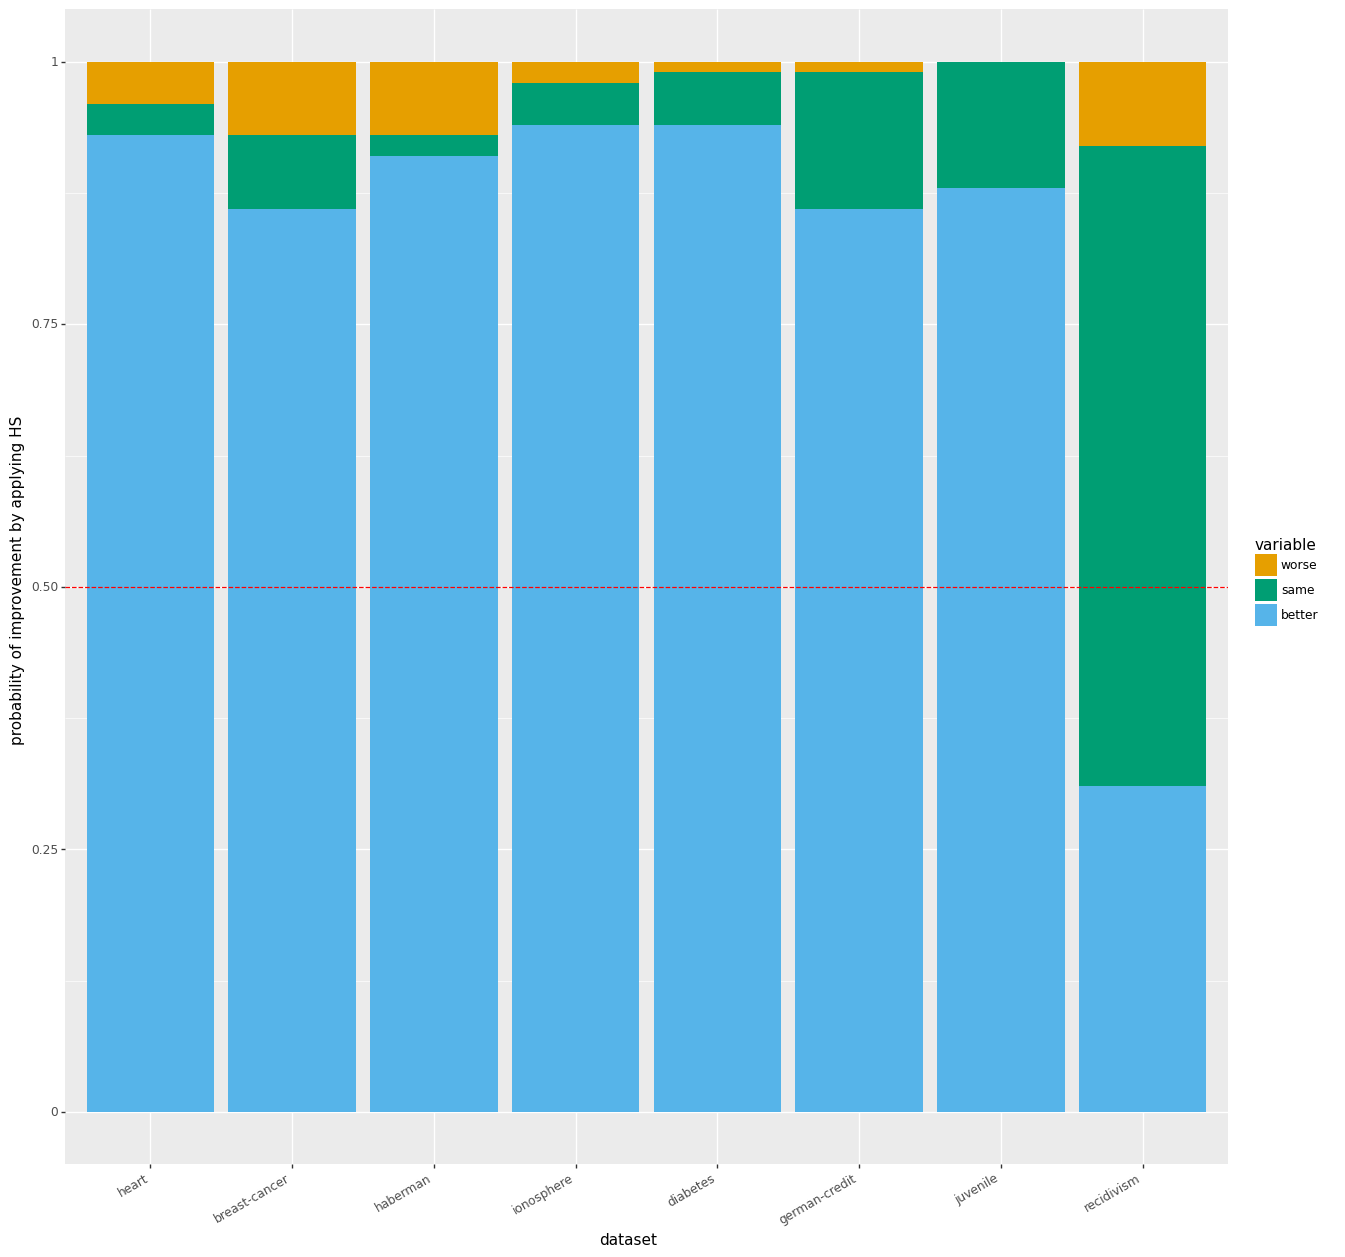

<ggplot: (8776864116872)>

/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: graphs/DT-top-likelihood.png


Any


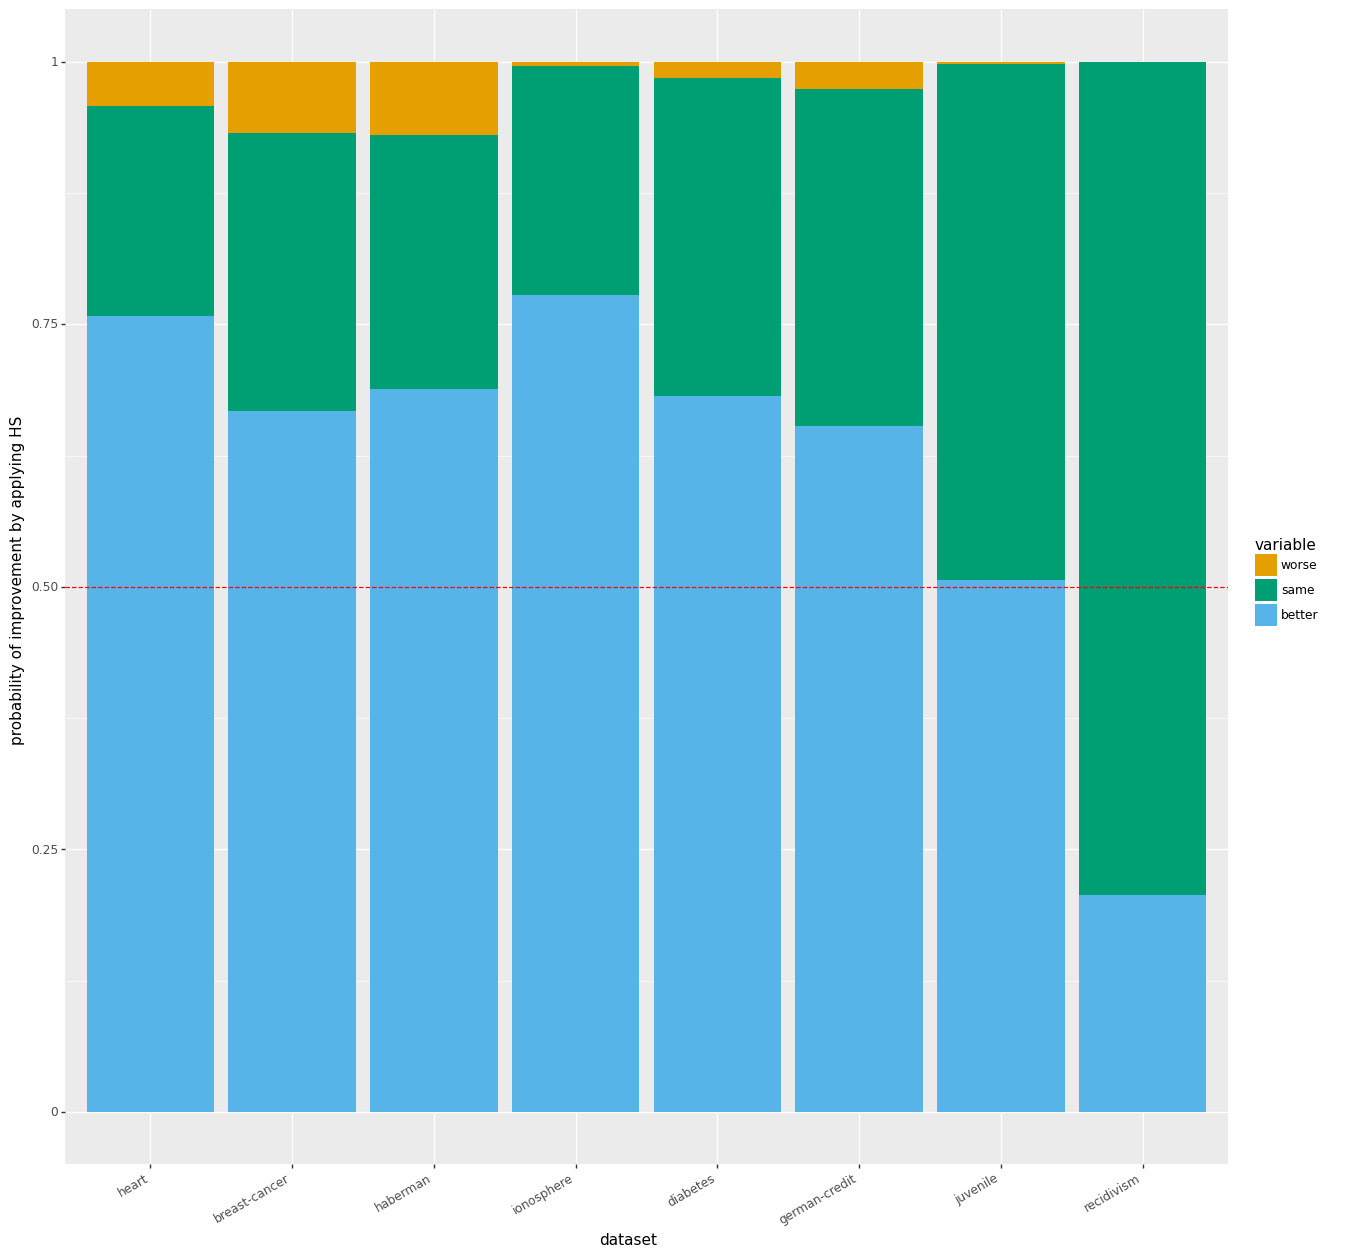

<ggplot: (8776853530393)>

/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: graphs/DT-any-likelihood.png


Heuristic


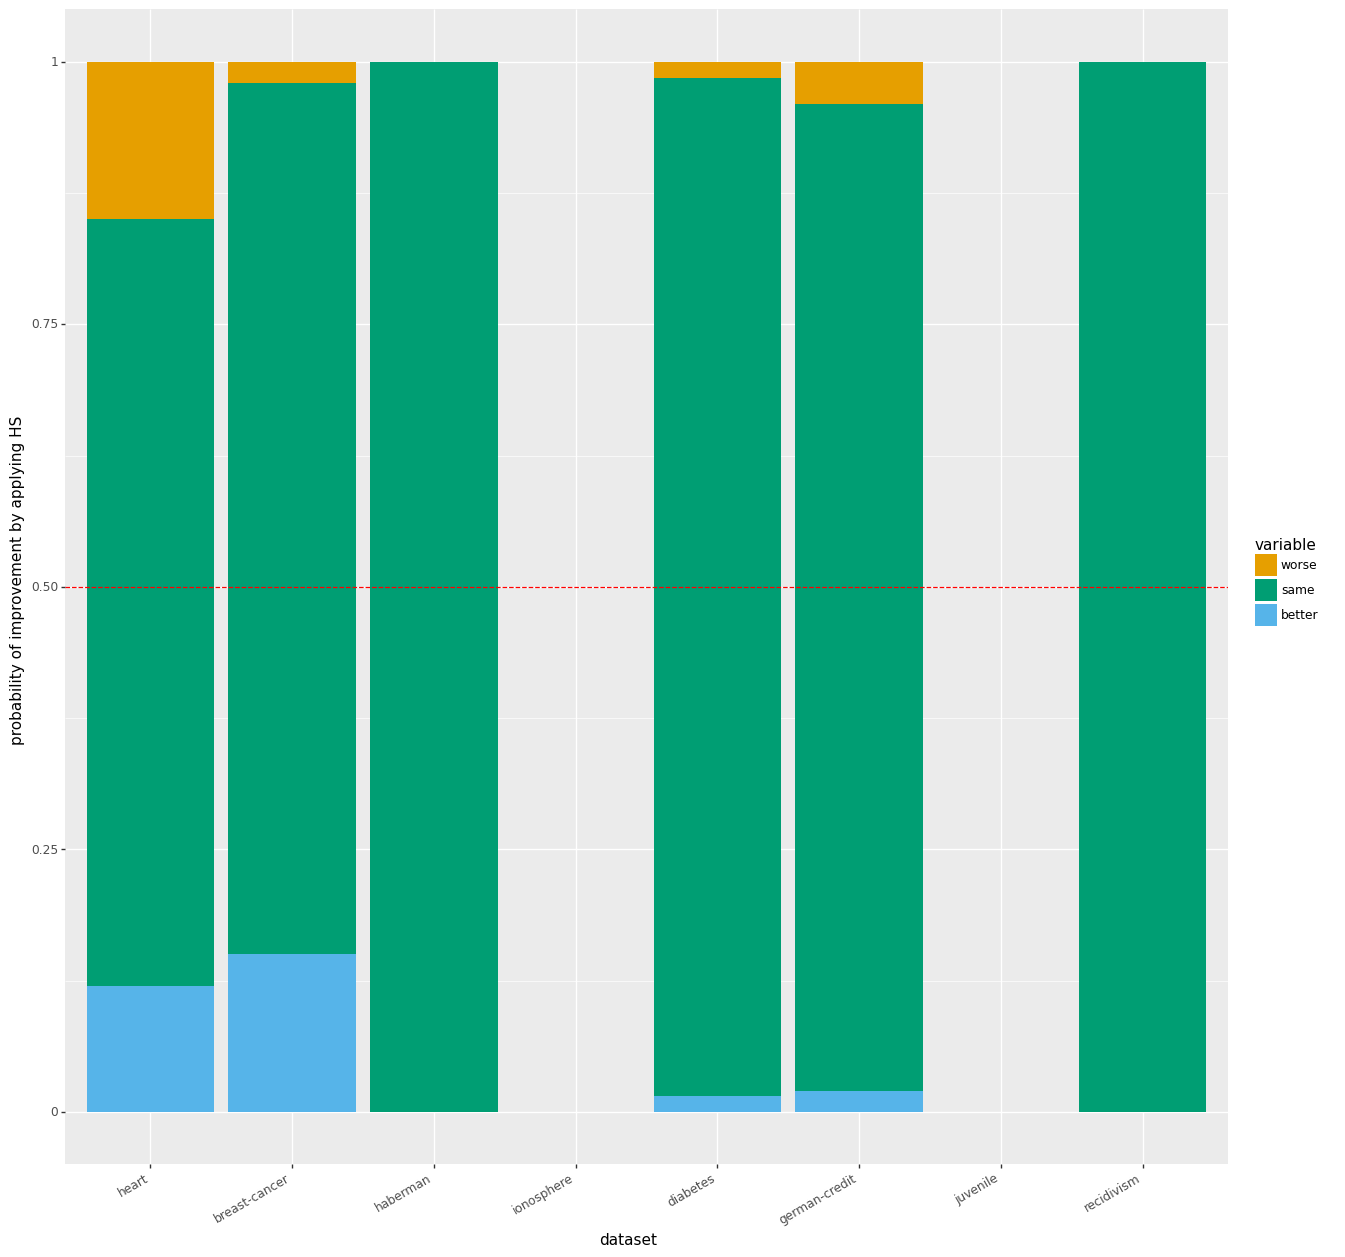

<ggplot: (8776847567479)>

/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: graphs/DT-heauristic-likelihood.png


Leaves


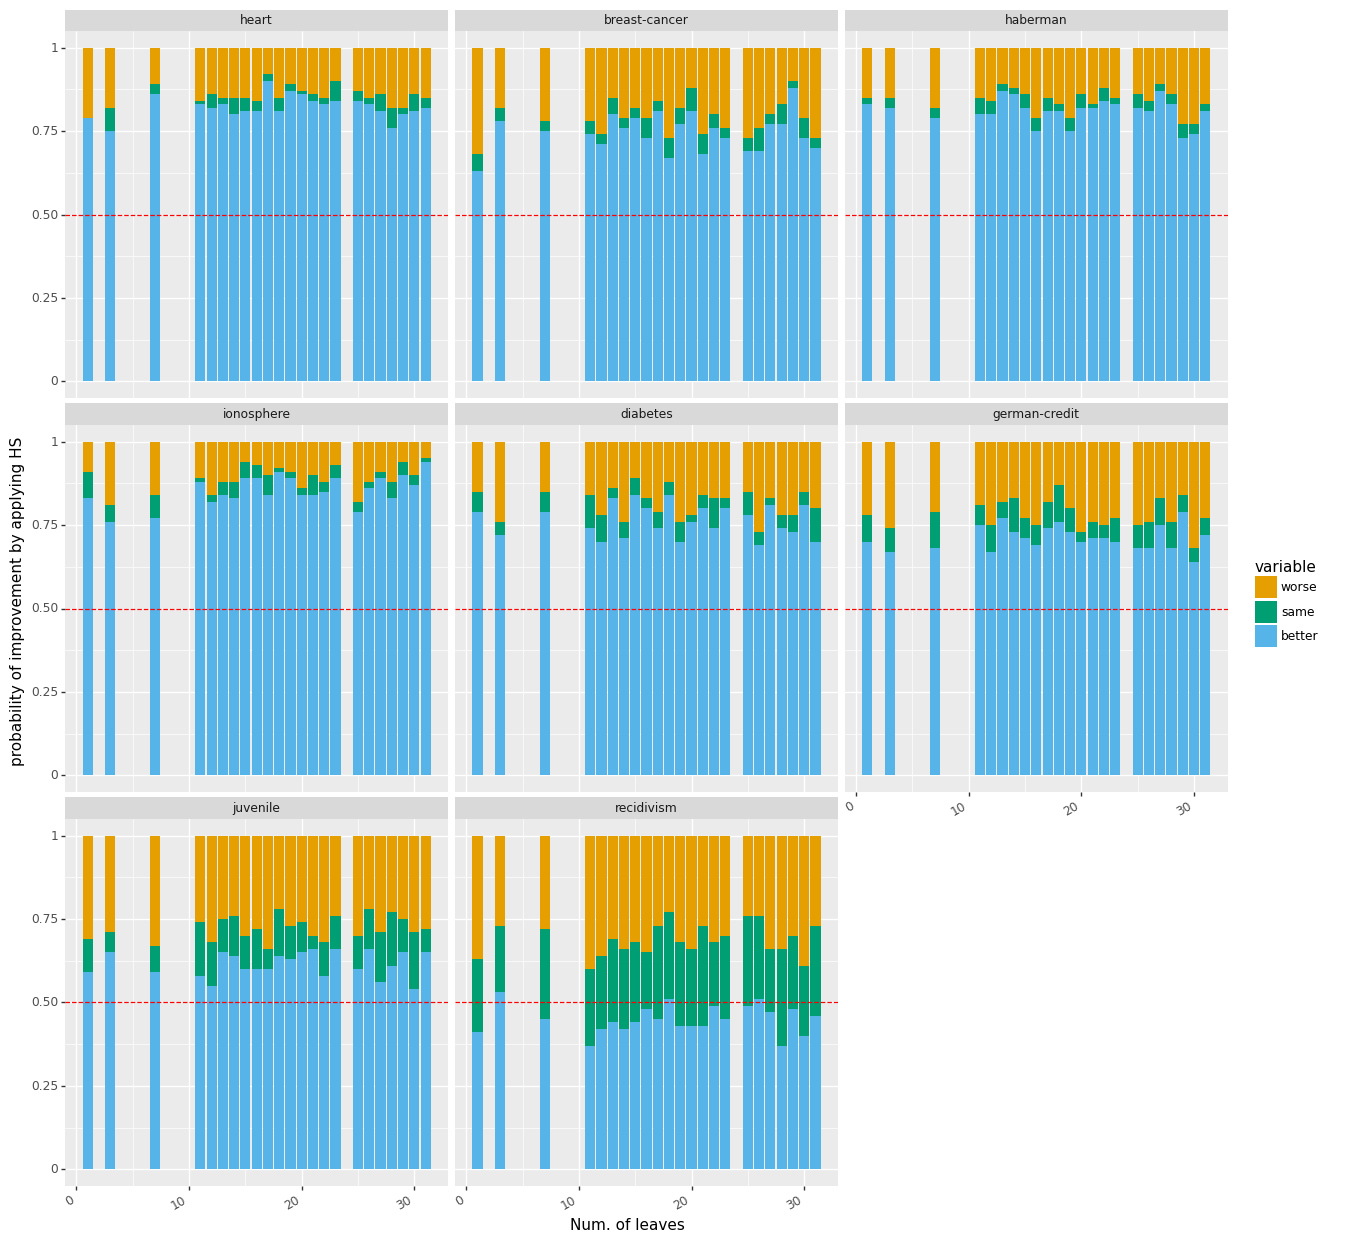

<ggplot: (8776847536843)>

/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: graphs/DT-leaf-likelihood.png


In [78]:
top_imp_disp = {"dataset": [], "better": [], "worse": [], "same": []}
dataset_order = ["heart", "breast-cancer", "haberman", "ionosphere", "diabetes", "german-credit", "juvenile", "recidivism"]

for dataset in top_improvement.keys():
    top_imp_disp["dataset"].append(dataset)
    top_imp_disp["better"].append(top_improvement[dataset][0])
    top_imp_disp["same"].append(top_improvement[dataset][1])
    top_imp_disp["worse"].append(top_improvement[dataset][2])
top_imp_disp = pd.DataFrame(top_imp_disp)

top_imp_disp = pd.melt(top_imp_disp, id_vars=['dataset'], value_vars=['better', "same", 'worse'])
top_imp_disp["dataset"] = pd.Categorical(top_imp_disp["dataset"], categories = dataset_order, ordered = True)
top_imp_disp["variable"] = pd.Categorical(top_imp_disp["variable"], categories = ['worse', "same", 'better'], ordered = True)

any_imp_disp = {"dataset": [], "better": [], "worse": [], "same": []}

for dataset in top_improvement.keys():
    any_imp_disp["dataset"].append(dataset)
    any_imp_disp["better"].append(any_improvement[dataset][0])
    any_imp_disp["same"].append(any_improvement[dataset][1])
    any_imp_disp["worse"].append(any_improvement[dataset][2])
any_imp_disp = pd.DataFrame(any_imp_disp)

any_imp_disp = pd.melt(any_imp_disp, id_vars=['dataset'], value_vars=['better', "same", 'worse'])
any_imp_disp["dataset"] = pd.Categorical(any_imp_disp["dataset"], categories = dataset_order, ordered = True)
any_imp_disp["variable"] = pd.Categorical(any_imp_disp["variable"], categories = ['worse', "same", 'better'], ordered = True)

heuristic_imp_disp = {"dataset": [], "better": [], "worse": [], "same": []}

for dataset in heuristic_improvement.keys():
    heuristic_imp_disp["dataset"].append(dataset)
    heuristic_imp_disp["better"].append(heuristic_improvement[dataset][0])
    heuristic_imp_disp["same"].append(heuristic_improvement[dataset][1])
    heuristic_imp_disp["worse"].append(heuristic_improvement[dataset][2])
heuristic_imp_disp = pd.DataFrame(heuristic_imp_disp)

heuristic_imp_disp = pd.melt(heuristic_imp_disp, id_vars=['dataset'], value_vars=['better', "same", 'worse'])
heuristic_imp_disp["dataset"] = pd.Categorical(heuristic_imp_disp["dataset"], categories = dataset_order, ordered = True)
heuristic_imp_disp["variable"] = pd.Categorical(heuristic_imp_disp["variable"], categories = ['worse', "same", 'better'], ordered = True)

baseline_imp_disp = {"dataset": [], "better": [], "worse": [], "same": []}

for dataset in baseline_improvement.keys():
    baseline_imp_disp["dataset"].append(dataset)
    baseline_imp_disp["better"].append(baseline_improvement[dataset][0])
    baseline_imp_disp["same"].append(baseline_improvement[dataset][1])
    baseline_imp_disp["worse"].append(baseline_improvement[dataset][2])
baseline_imp_disp = pd.DataFrame(baseline_imp_disp)

baseline_imp_disp = pd.melt(baseline_imp_disp, id_vars=['dataset'], value_vars=['better', "same", 'worse'])
baseline_imp_disp["dataset"] = pd.Categorical(baseline_imp_disp["dataset"], categories = dataset_order, ordered = True)
baseline_imp_disp["variable"] = pd.Categorical(baseline_imp_disp["variable"], categories = ['worse', "same", 'better'], ordered = True)

leaf_imp_disp = {"dataset": [], "n_leaves": [], "better": [], "worse": [], "same": []}

for dataset in leaf_improvement.keys():
    for n_leaves in leaf_improvement[dataset].keys():
        leaf_imp_disp["dataset"].append(dataset)
        leaf_imp_disp["n_leaves"].append(n_leaves)
        leaf_imp_disp["better"].append(leaf_improvement[dataset][n_leaves][0])
        leaf_imp_disp["same"].append(leaf_improvement[dataset][n_leaves][1])
        leaf_imp_disp["worse"].append(leaf_improvement[dataset][n_leaves][2])
leaf_imp_disp = pd.DataFrame(leaf_imp_disp)

leaf_imp_disp = pd.melt(leaf_imp_disp, id_vars=['dataset', "n_leaves"], value_vars=['better', "same", 'worse'])
leaf_imp_disp["dataset"] = pd.Categorical(leaf_imp_disp["dataset"], categories = dataset_order, ordered = True)
leaf_imp_disp["variable"] = pd.Categorical(leaf_imp_disp["variable"], categories = ['worse', "same", 'better'], ordered = True)

plotnine.options.figure_size = (5, 5)

print("Top")
g = (ggplot(top_imp_disp, aes(fill="variable", y="value", x="dataset")) + 
    geom_bar(position="stack", stat="identity") +
    geom_hline(yintercept = [0.5], color = "red", linetype="dashed") +
    xlab("dataset") +
    ylab("probability of improvement by applying HS") + 
     scale_fill_manual(values=["#E69F00", "#009E73", "#56B4E9"]) + 
    theme(axis_text_x=element_text(rotation=30, hjust=1))
)

display(g)

g.save(filename = "graphs/DT-top-likelihood.png", height = 5, width = 5, units = "in", dpi = 1000)

print("Any")
g = (ggplot(any_imp_disp, aes(fill="variable", y="value", x="dataset")) + 
    geom_bar(position="stack", stat="identity") +
    geom_hline(yintercept = [0.5], color = "red", linetype="dashed") +
    xlab("dataset") +
    ylab("probability of improvement by applying HS") + 
     scale_fill_manual(values=["#E69F00", "#009E73", "#56B4E9"]) + 
    theme(axis_text_x=element_text(rotation=30, hjust=1))
)

display(g)

g.save(filename = "graphs/DT-any-likelihood.png", height = 5, width = 5, units = "in", dpi = 1000)

print("Heuristic")
g = (ggplot(heuristic_imp_disp, aes(fill="variable", y="value", x="dataset")) + 
    geom_bar(position="stack", stat="identity") +
    geom_hline(yintercept = [0.5], color = "red", linetype="dashed") +
    xlab("dataset") +
    ylab("probability of improvement by applying HS") + 
     scale_fill_manual(values=["#E69F00", "#009E73", "#56B4E9"]) + 
    theme(axis_text_x=element_text(rotation=30, hjust=1))
)

display(g)

g.save(filename = "graphs/DT-heauristic-likelihood.png", height = 5, width = 5, units = "in", dpi = 1000)

plotnine.options.figure_size = (15, 15)

print("Leaves")
g = (ggplot(leaf_imp_disp, aes(fill="variable", y="value", x="n_leaves")) + 
    geom_bar(position="stack", stat="identity") +
    geom_hline(yintercept = [0.5], color = "red", linetype="dashed") +
    xlab("Num. of leaves") +
    ylab("probability of improvement by applying HS") + 
     scale_fill_manual(values=["#E69F00", "#009E73", "#56B4E9"]) + 
    theme(axis_text_x=element_text(rotation=30, hjust=1)) +
    facet_wrap("dataset")
)

display(g)

g.save(filename = "graphs/DT-leaf-likelihood.png", height = 5, width = 5, units = "in", dpi = 1000)

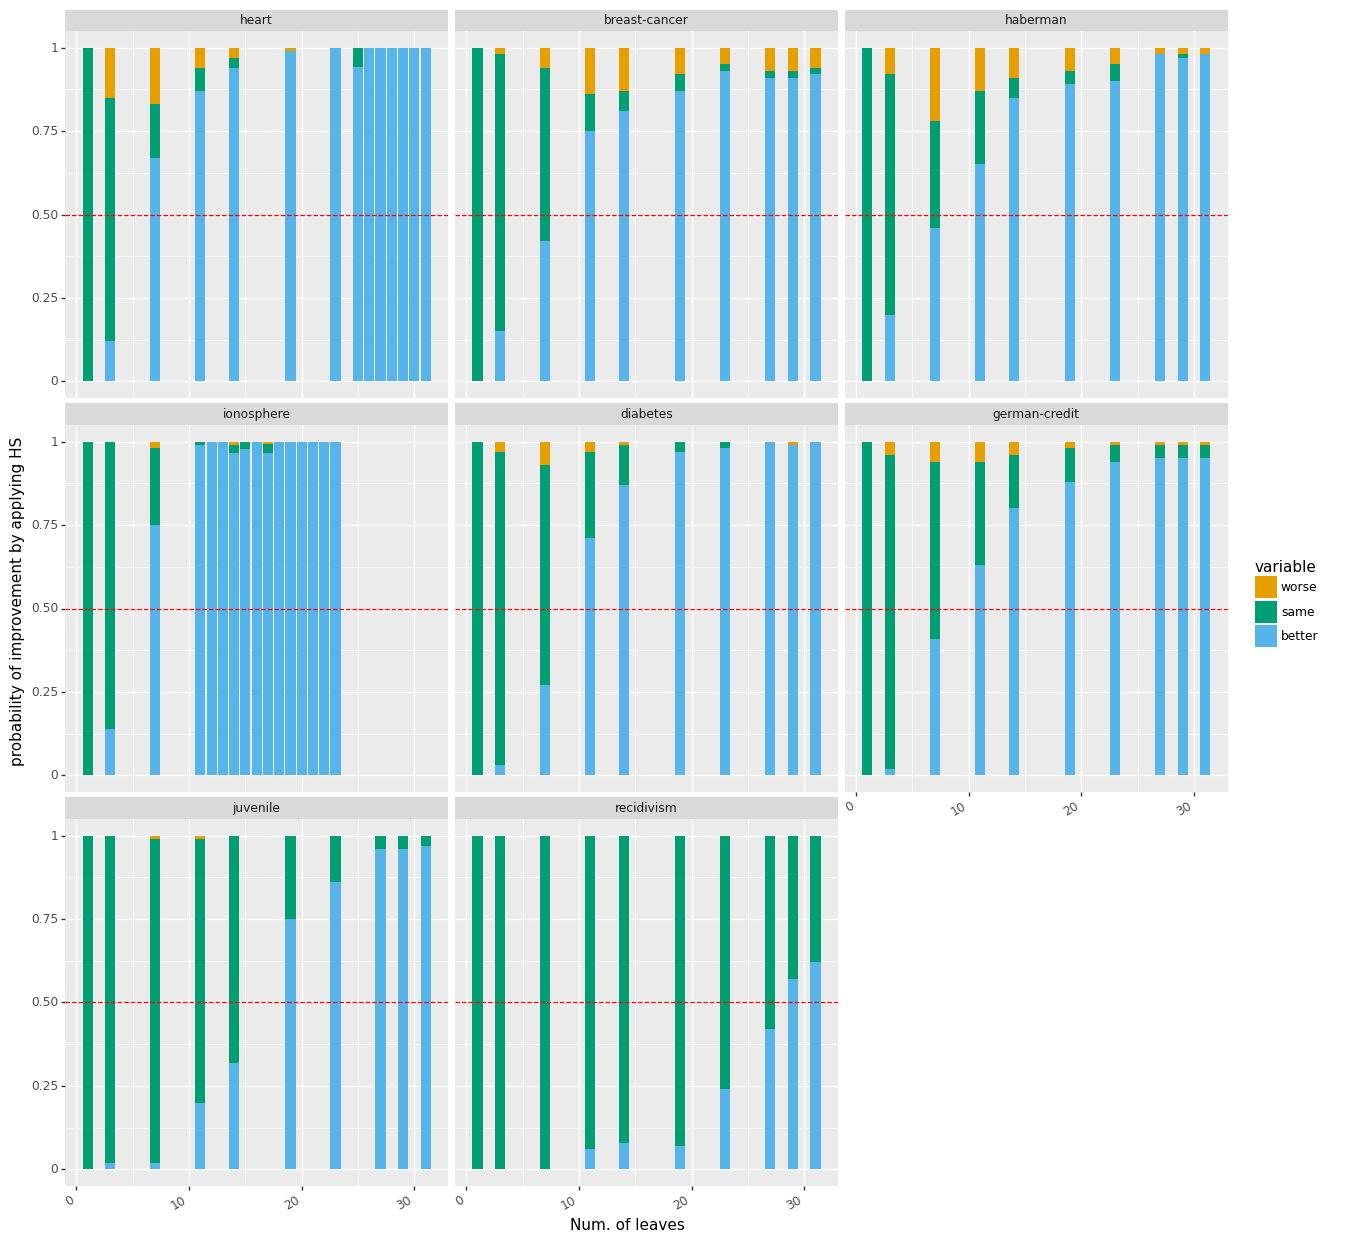

<ggplot: (8776864116785)>

In [76]:
leaf_improvement = classification.loc[(classification.algorithm == "HS (CART)")][["dataset", "test_score", "n_leaves"]]
leaf_improvement["dt_score"] = np.array(classification.loc[(classification.algorithm == "DT")]["test_score"])
leaf_improvement["diff"] = np.abs(leaf_improvement["test_score"] - leaf_improvement["dt_score"])
leaf_improvement["better"] = (leaf_improvement["test_score"] > leaf_improvement["dt_score"]) & (leaf_improvement["diff"] > 0.005)
leaf_improvement["same"] = (leaf_improvement["diff"] < 0.005)
leaf_improvement["worse"] = (leaf_improvement["test_score"] < leaf_improvement["dt_score"]) & (leaf_improvement["diff"] > 0.005)
leaf_imp_disp = pd.melt(leaf_improvement.groupby(["dataset", "n_leaves"]).mean().reset_index(), id_vars=["dataset", "n_leaves"], value_vars=["better", "same", "worse"])

leaf_imp_disp["dataset"] = pd.Categorical(leaf_imp_disp["dataset"], categories = dataset_order, ordered = True)
leaf_imp_disp["variable"] = pd.Categorical(leaf_imp_disp["variable"], categories = ['worse', "same", 'better'], ordered = True)

g = (ggplot(leaf_imp_disp, aes(fill="variable", y="value", x="n_leaves")) + 
    geom_bar(position="stack", stat="identity") +
    geom_hline(yintercept = [0.5], color = "red", linetype="dashed") +
    xlab("Num. of leaves") +
    ylab("probability of improvement by applying HS") + 
     scale_fill_manual(values=["#E69F00", "#009E73", "#56B4E9"]) + 
    theme(axis_text_x=element_text(rotation=30, hjust=1)) +
    facet_wrap("dataset")
)

display(g)

In [51]:
import matplotlib.pyplot as matplotlib

In [56]:
from plotnine import *
from plotnine.data import *

%matplotlib inline

# We use theme_void as the base theme so that the modifications
# we make in the code are transparent in the output
theme_set(theme_gray())

In [65]:
leaf_imp_disp

,dataset,n_leaves,variable,value
0,breast-cancer,1,better,0.774762
1,breast-cancer,3,better,0.774762
2,breast-cancer,7,better,0.774762
3,breast-cancer,11,better,0.774762
4,breast-cancer,12,better,0.774762
...,...,...,...,...
547,recidivism,27,worse,0.000000
548,recidivism,28,worse,0.000000
549,recidivism,29,worse,0.000000
550,recidivism,30,worse,0.000000
